<a href="https://colab.research.google.com/github/Ro-netizen004/Efficiency-Predictor/blob/main/Fuel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Read .data file
df = pd.read_csv(
    "auto-mpg.data",
    delim_whitespace=True,  # split on whitespace
    header=None, # do not consider first row as column headers
    quotechar='"', # include characters inside quotations to make ONE element
    na_values="?"  # fill question marks with nan
)

df.head()

/tmp/ipython-input-1382748823.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
# Assign column names to the dataframe
cols = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name"]
df.columns = cols
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
df.isna().sum()
# Total of 6 incomplete rows in horsepower

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
car_name,0


In [ ]:
missing_hp_indices = df[df['horsepower'].isna()].index
missing_hp_indices

Index([32, 126, 330, 336, 354, 374], dtype='int64')

In [ ]:
df.loc[32, "horsepower"] = 75
df.loc[126, "horsepower"] = 120
df.loc[330, "horsepower"] = 55
df.loc[336, "horsepower"] = 132
df.loc[354, "horsepower"] = 82
df.loc[374, "horsepower"] = 82

In [ ]:
df.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model_year,0
origin,0
car_name,0


In [ ]:
print(df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object


In [15]:
# split data into x and y
x = df.drop(["mpg","car_name"], axis=1)
y = df["mpg"]

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [18]:
# predict on the testing set
# y_preds are the predicted values based on the features
# compare preds to actual values to determine performance of the model
y_pred = model.predict(x_test)

In [19]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Evaluate the performance of the model
r2 = r2_score(y_test, y_pred) # variance of the dependent variable explained by the independent variables
                              # how well the model fits the data, higher is better
# average square distance between predicted and actual results, lower is better
mse = mean_squared_error(y_test, y_pred)
# average absolute distance between predicted and actual results, lower is better
mae = mean_absolute_error(y_test, y_pred)
#starting point of the regression line on the y-axis
intercept = model.intercept_

print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Intercept:", intercept)

R2 Score: 0.8474577799523466
Mean Squared Error: 8.201652693692282
Mean Absolute Error: 2.2526268508822587
Intercept: -19.389576185991906


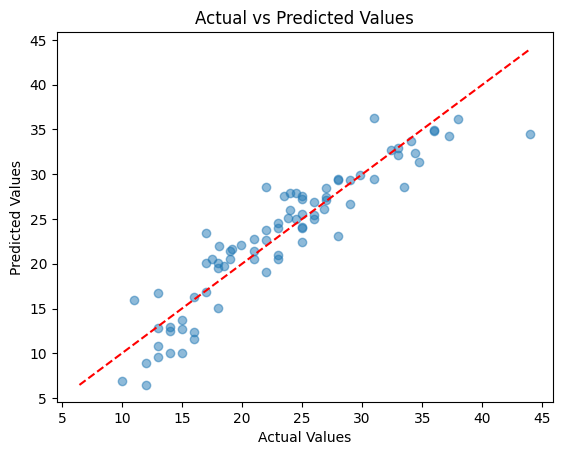

In [20]:
import matplotlib.pyplot as plt
# plot predicted vs actual values

plt.scatter(y_test, y_pred, alpha = 0.5)
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='y = x')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()


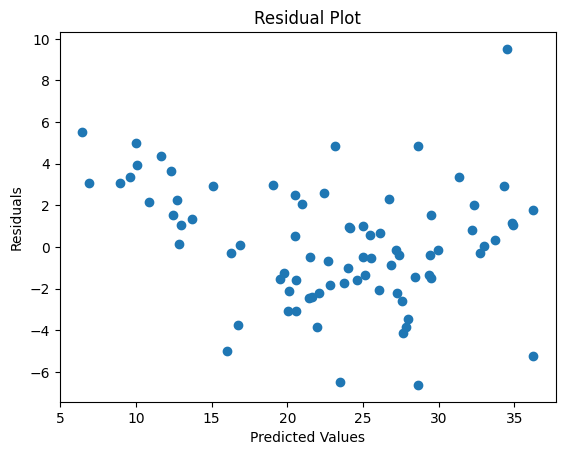

In [21]:
# Plot residuals
# Residuals are plotted against the predicted values of the target variable.
# Residual plot should show a random scatter of points around zero
plt.scatter(y_pred, y_test - y_pred)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

Dataset: Quinlan, R. (1993). Auto MPG [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5859H


In [25]:
import joblib
joblib.dump(model, "fuel_efficiency_model.pkl")

['fuel_efficiency_model.pkl']